In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [ ]:
import pandas as pd
df1= pd.read_csv('./산림치유프로그램목적.csv', encoding='cp949')
df1

프로그램 운영목적 일련번호  ...                                       프로그램 운영목적 내용
0   PU_00000000000000000  ...  「2019 무섬 외나무다리축제」연계 산림치유프로그램을 통해 국립 산림치유원 및 산림...
1   PU_00000000000000001  ...  「2019 영주 한국선비문화축제」연계 산림치유프로그램을 통해 국립산림치유원 및 산림...
2   PU_00000000000000002  ...  각 기관별 4회차 프로그램을 통해 누구나 참여가능한 주기적인 산림복지서비스 체험 기...
3   PU_00000000000000005  ...  건전한 놀거리를 제공하여 휴식과 여가의 새로운 방향을 제시하는 동시에 산림치유 인자...
4   PU_00000000000000006  ...      고객 예약 부진 기간 활성화를 위한 1박 2일 상품 기획으로 유휴객실 가동률 제고
..                   ...  ...                                                ...
65  PU_00000000000000377  ...  편백 숲 인자를 활용한 프로그램으로 심리적 우울·불안감을 극복하여 삶의 안정감을 도...
66  PU_00000000000000378  ...              평소 산림복지서비스 체험기회가 적었던 사회적 취약계층 발굴 및 선정
67  PU_00000000000000379  ...          한국산림복지진흥원 및 국립산림치유원에 대한 유관기관 관계자의 이해도를 높임
68  PU_00000000000000383  ...  한국산림아카데미 산림최고경영자 양성과정 참여자를 대상으로 일상생활 스트레스 해소 및...
69  PU_00000000000000384  ...  호남권 시/도관리위원회 간부를 대상으로 산림치유 프로그램 체험기회를 제공함으로써, ...

[70 rows x 4 columns]

In [ ]:
df1 = df.drop([0])

#전처리 및 형태소 분석

In [ ]:
import re
import numpy as np

def clean_str(text):
    if text == np.nan:
        return ''
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '\n'         #줄바꿈제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    return text 

df1['text']=df1['프로그램 운영목적 내용'].apply(clean_str)

In [ ]:
df1['text']

0      2019 무섬 외나무다리축제 연계 산림치유프로그램을 통해 국립 산림치유원 및 산림...
1      2019 영주 한국선비문화축제 연계 산림치유프로그램을 통해 국립산림치유원 및 산림...
2     각 기관별 4회차 프로그램을 통해 누구나 참여가능한 주기적인 산림복지서비스 체험 기...
3     건전한 놀거리를 제공하여 휴식과 여가의 새로운 방향을 제시하는 동시에 산림치유 인자...
4         고객 예약 부진 기간 활성화를 위한 1박 2일 상품 기획으로 유휴객실 가동률 제고
                            ...                        
65    편백 숲 인자를 활용한 프로그램으로 심리적 우울 불안감을 극복하여 삶의 안정감을 도...
66                평소 산림복지서비스 체험기회가 적었던 사회적 취약계층 발굴 및 선정
67            한국산림복지진흥원 및 국립산림치유원에 대한 유관기관 관계자의 이해도를 높임
68    한국산림아카데미 산림최고경영자 양성과정 참여자를 대상으로 일상생활 스트레스 해소 및...
69    호남권 시 도관리위원회 간부를 대상으로 산림치유 프로그램 체험기회를 제공함으로써  ...
Name: text, Length: 70, dtype: object

In [ ]:
!pip3 install konlpy

In [ ]:
from konlpy.tag import Kkma
kkma=Kkma()

def to_nouns(text):
    text_pos=kkma.pos(text)
    nouns=[]

    for a,b in text_pos:
        if len(a)>1:
            if'NN' in b:
                nouns.append(a)
    return nouns

In [ ]:
#형태소 분석 및 stopwords를 제거
from tqdm import tqdm
nountexts=[]

for e in tqdm(df1['text']):
    temp_X=[]
    temp_X=to_nouns(e)
    temp_X=[e for e in temp_X if not e in stopwords]

    if len(temp_X)>0:
        nountexts.append(temp_X)

100%|██████████| 70/70 [00:17<00:00,  3.98it/s]


In [ ]:
#지금 분석된 단어들은 각 문서 별로 묶여있음
print(nountexts)

[['무섬', '외나무', '다리', '축제', '연계', '산림', '치유', '프로그램', '국립', '산림', '유원', '산림', '치유', '국민', '인지도', '확산', '기여'], ['영주', '한국', '선비', '문화', '축제', '연계', '산림', '치유', '프로그램', '국립', '산림', '유원', '산림', '치유', '국민', '인지도', '확산', '기여'], ['기관', '프로그램', '참여', '가능', '주기적', '산림', '복지', '서비스', '체험', '기회'], ['건전', '거리', '제공', '휴식', '여가', '방향', '제시', '동시', '산림', '치유', '인자', '국민', '건강', '증진'], ['고객', '예약', '부진', '기간', '활성화', '상품', '기획', '유휴', '객실', '가동률', '제고'], ['교직원', '과도', '업무', '교권', '침해', '심신', '교사', '일상', '자연', '동적', '정적', '활동', '직무', '스트레스', '해소', '정서', '안정', '아가', '건강', '증진', '도모'], ['국립', '산림', '유원', '소개', '질의', '응답', '시설', '안내'], ['국립', '산림', '유원', '소개', '발표', '시설', '견학', '질의', '응답', '시설', '안내'], ['국립', '산림', '유원', '곤충', '생태', '원활', '지역', '연계', '프로그램', '운영', '곤충', '태원', '직원', '대상', '국립', '산림', '유원', '소개', '체험', '프로그램', '운영', '산림', '복지', '분야', '인지도', '이해도', '증진'], ['긍정적', '가치관', '형성', '자존', '향상', '프로그램', '사회', '적응력', '배양'], ['기관', '방문', '사회적', '취약', '계층', '동등', '산림', '복지', '서비스', '경험', '제공', '산림', '

# **빈도분석**

In [ ]:
all_texts=[]
for doc in nountexts:
    for e in doc:
        all_texts.append(e)

In [ ]:
#분석된 단어들의 순서
all_texts=pd.Series(all_texts)

In [ ]:
all_texts

0       무섬
1      외나무
2       다리
3       축제
4       연계
      ... 
853     장성
854     편백
855     치유
856    대내외
857     홍보
Length: 858, dtype: object

In [ ]:
all_texts.value_counts().head(10)

산림      61
치유      45
프로그램    35
제공      20
증진      19
건강      18
도모      16
스트레스    15
활용      14
심신      13
dtype: int64

In [ ]:
ncount=pd.DataFrame(all_texts.value_counts())

In [ ]:
ncount.to_excel('ncount.xlsx')

# 워드 클라우드 : 

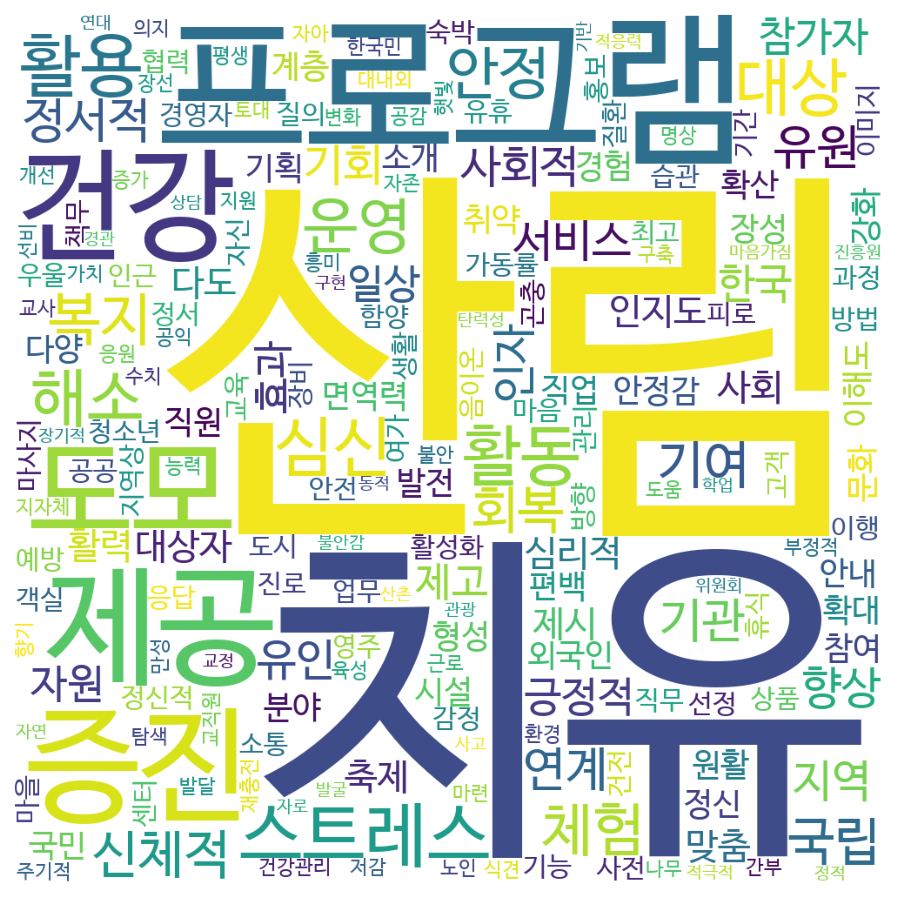

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color='white', width=1000, height=1000)
cloud = wc.generate_from_frequencies(all_texts.value_counts().head(200))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()